# Support Vector Machine (SVM) 
## 1.[Introduction](#intro)
## 2.[Maximum Margin Classifier](#hardmargin)
## 3.[Soft Margin Classifier](#softmargin)
## 4. [Coding Example in Python](#example)


----
## 1. Introduction <a name ='intro'></a>
### 1.1 Distance from a point to a hyperplane <a name ='distance' ></a>
In the 2-dimensional, distance from a point $(x_0, y_0)$ to a line $w_1x + w_2y + b = 0$:  
  
$$ \frac {|w_1x_0 + w_2y_0 + b|}{\sqrt{w_1^2 +w_2^2}} $$  
   
In the 3-dimensional, distance from a point $(x_0,y_0,z_0)$ to a plane $w_1x + w_2y +w_3z + b = 0$:  
   
$$ \frac {|w_1x_0 + w_2x_0 +w_3z_0+ b|}{\sqrt{w_1^2 +w_2^2+w_3^2}} $$  
   
In general, distance from a vector $x_0$ to a hyperplane $w^Tx + b = 0$: 
$$ \frac{w^Tx_0 + b}{||w||_2}$$ with $||\mathrm{w}||_2 = \sqrt{\displaystyle\sum_{i=1}^d w_i^2}$ in d-dimensional space   
     
### 1.2 Lagrange Multipliers & KKT conditions
**Purposes**: to find the stationary points of a function of several variables subject to one or more constraints   
 
#### 1.2.1 Starting with a simple problem
$$\begin{eqnarray} 
    max ~f(x_1,x_2) \\ 
\text{subject to:} ~ g(x_1,x_2) = 0 
\end{eqnarray}$$
  
**Geometrical perspective:**  
Consider a D-dimensional variable x with components $x_1,x_2...x_D$  
The constraint equation $g(x)=0$ then represents a *(D-1)*-dimensional surface in x-space  
1. Any point to the constraint surface the gradient $\nabla g(x)$ of the constraint function $g(x) = 0 $ will be orthogonal to the surface.  
**Demonstration:** Consider a point $x$ and $x+\epsilon$ lies on the surface => $g(x) = g(x+\epsilon)$  
With Taylor expansion around $x$, $g(x+\epsilon) \simeq g(x) + \epsilon^T\nabla g(x)$   
It means $\epsilon^T\nabla g(x) \simeq 0$. In the limit $\parallel\epsilon\parallel \to 0$, $\epsilon^T\nabla g(x) = 0$  
Because $\epsilon$ is parallel to the constraint surface $g(x) = 0 $, we see that $\nabla g$ is normal to the surface
    
2. Our purpose is to seek a point $x^*$ on the constraint surface such that $f(x)$ is maximized. Note that $\nabla f(x)$ is orthogonal to the constraint surface because otherwise we could increase the value of $f(x)$ by moving a short distance along the constraint surface. Thus $\nabla f$ and $\nabla g$ are parallel or anti-parallel vectors   
 $$\nabla f + \lambda\nabla g = 0 $$  
   
3. Now consider the problem 
$$\begin{eqnarray} 
    max ~f(x_1,x_2) \\ 
\text{subject to:} ~ g(x_1,x_2) \geq 0 
\end{eqnarray}$$
  
+> the constrained stationary point lies in the region where $g(x) > 0$,  The function $g(x)$ plays no role and so the stationary condition is simply $\nabla f(x) = 0$ => $\lambda = 0$    
+> it lies on the boundary $g(x) = 0$.  
   
For either of 2 cases, $\lambda g(x) = 0$   
    
So the solution for problem (*) is KKT conditions: 
$$  g(x) \geq 0 \\
\lambda \geq 0 \\
\lambda g(x) = 0 $$


#### 1.2.2 General Problem
  $$\begin{eqnarray} \mathbf{x}^* &=& \arg\min_{\mathbf{x}} f_0(\mathbf{x}) \\
\text{subject to:}~ && f_i(\mathbf{x}) \leq 0, ~~ i = 1, 2, \dots, m ~~~\\ && h_j(\mathbf{x}) = 0, ~~ j = 1, 2, \dots, p \end{eqnarray} \\ 
\text{in } \mathcal{D} = (\cap_{i=0}^m \text{dom}f_i) \cap (\cap_{j=1}^p \text{dom}h_j)$$   
   
**Lagrangian:** 
$$\mathcal{L}(\mathbf{x}, \lambda, \nu) = f_0(\mathbf{x}) + \sum_{i=1}^m \lambda_if_i(\mathbf{x}) + \sum_{j=1}^p \nu_j h_j(\mathbf{x})$$  
  
$$\text{with } \lambda = [\lambda_1, \lambda_2, \dots, \lambda_m]; \nu = [\nu_1, \nu_2, \dots, \nu_p]$$  
   
## 2. Maximum Margin Classifiers <a name='hardmargin'></a>
The training data set comprises N input vectors $x_1,x_2,...,x_N$ with corresponding target values $t_1,t_2,...,t_N$ where $t_n \in \{-1,1\}$  
Assuming that the training data set is linearly separable in feature space. It means that there exists at least one choice of parameters $\mathbf w$ and *b* such that $y(x) = \mathbf w^T \phi(x) +b$ satisfies $y(x_n) > 0$ for points having $t_n = +1$ and $y(x_n) < 0$ for points having $t_n = -1$ so that $t_ny(x_n) > 0$ for all training data points.   
   
There may of course exist many such solutions that separate the classes exactly. If there are multiple solutions all of which classify the training data set exactly, then we should try to find the one that will give the smallest generalization error.   
  
### 2.1 Margin 
Margin is defined to be the smallest distance between the decision boundary and any of the points.  
    
### 2.2 Maximum Margin 
In SVM, the decision boundary is chosen to be the one for which the margin is maximized.   

### 2.3 Maximum Margin Classifiers 
We described [above](#distance), the perpendicular distance of a point x from a hyperplain defined by $y(x) = 0$ where $y(x) = \mathbf w^T \phi(x) +b$ is $$\frac{| y(x)|}{\parallel \mathbf w \parallel}$$   
   
Thus the distance of a point $x_n$ to the decision surface is given by   
   
$$\frac{t_n y(x_n)}{\parallel \mathbf w \parallel} = \frac {t_n(\mathbf w^T \phi(x) +b)}{\parallel \mathbf w \parallel} $$ 
   
we wish to optimize the parameters $\mathbf w$ and $b$ in order to maximize this distance. The maximum margin solution is found by solving 

$$(\mathbf{w}, b) = \arg\max_{\mathbf{w}, b} \left\{ \min_{n} \frac{t_n(\mathbf{w}^T\mathbf{\phi(x_n)} + b)}{||\mathbf{w}||_2} \right\} = \arg\max_{\mathbf{w}, b}\left\{ \frac{1}{||\mathbf{w}||_2} \min_{n} t_n(\mathbf{w}^T\mathbf{\phi(x_n)} + b) \right\} ~~~ (1)$$  
   
We note that if we make the rescaling $\mathbf w \to k\mathbf{w}$ and $b \to kb$, then the distance from any point $x_n$ to the decision surface is unchanged. So we can set: $$t_n(\mathbf{w}^T\mathbf{\phi(x_n)} + b) = 1 $$ **for the point that is closest to the surface**  
  
=> $$t_n(\mathbf{w}^T\mathbf{\phi(x_n)} + b) \geq 1 ~~ \forall x_n $$
  
So our problem becomes 
$$(\mathbf{w}, b) = \arg\min_{\mathbf{w}, b} \frac{1}{2}||\mathbf{w}||^2 \\
\text{subject to:} ~ t_n(\mathbf{w}^T\mathbf{\phi(x_n)} + b) \geq 1 ~~ \forall n = 1,2,..,N ~~~ (2)$$
  
This is an example of a *quadratic programming* problem in which we are trying to minimize a quadratic function (convex function) subject to a set of linear inequality constraints (convex constraints). So this is a** convex problem**. 
=> **We have only one solution.**
  
$$\mathcal{L}(\mathbf w, b, \lambda) = \frac{1}{2}||\mathbf{w}||^2 - \displaystyle\sum_{n=1}^N \lambda_n \bigg( t_n\big(\mathbf{w}^T\mathbf{\phi(x_n)} + b\big) - 1 \bigg)$$ 
where $\lambda = (\lambda_1, ...,\lambda_N)^T$ and $\lambda_n \geq 0, \forall n = 1,2,...,N$  
  
**Lagrange dual function**  
$$ g(\lambda) = \min_{\mathbf{w}, b} \mathcal{L}(\mathbf{w}, b, \lambda) ~~ where ~~ \lambda \succeq 0$$ 
  
$$  
 \begin{eqnarray} \frac{\partial \mathcal{L}(\mathbf{w}, b, \lambda)}{\partial \mathbf{w}} &=& \mathbf{w} - \sum_{n=1}^N \lambda_n t_n \mathbf{\phi(x_n)} = 0 \Rightarrow \mathbf{w} = \sum_{n=1}^N \lambda_n t_n \mathbf{\phi(x_n)} ~~~~~ (3)\\
\frac{\partial \mathcal{L}(\mathbf{w}, b, \lambda)}{\partial b} &=& \sum_{n=1}^N \lambda_nt_n = 0 ~~~~~~~~~~(4) \end{eqnarray} $$  
   
   ---
$$ g(\lambda) = \sum_{n=1}^N \lambda_n -\frac{1}{2}\sum_{n=1}^N \sum_{m=1}^N \lambda_n\lambda_m t_n t_m k(\mathbf{x}_n;\mathbf{x}_m)$$  
  
with $$\lambda_n \geq 0, n = 1,2,...N$$
    $$\displaystyle\sum_{n=1}^N \lambda_nt_n = 0 $$  
    
and $$k(x,x') = \phi(x)^T\phi(x')$$

     
---

#### Comments:  
1. The solution to a quadratic programming problem in M variables in general has computational complexity that is $O(M^3)$. Now we turn the original optimization problem, which involved minimizing over M variables, into the dual problem which has $N$ variables.   
If $M < N$, the move to dual problem appreas disadvantageous.  
However, it allows the model to be reformulated using **kernels**, and so the maximum margin classifier can be applied efficiently to feature spaces whose dimensionality exceeds the number of data points, including infinite feature spaces.   
   
The solution for this problem satisfies the KKT conditions: 
$$  
\begin{eqnarray} 1 - t_n(\mathbf{w}^T\mathbf{x}_n + b) &\leq& 0, ~ \forall n = 1, 2, \dots, N ~~~~(5) \\
\lambda_n &\geq& 0, ~\forall n = 1, 2, \dots, N \\
\lambda_n (1 - t_n(\mathbf{w}^T\mathbf{x}_n + b)) &=& 0, ~\forall n = 1, 2, \dots, N ~~~~(6) \\
\mathbf{w} &=& \sum_{n=1}^N \lambda_n t_n \mathbf{\phi(x_n)} ~~~~~~~~~~~(7)\\ \sum_{n=1}^N \lambda_nt_n &=& 0 ~~~~~~~~~~~~~~~~~~~(8) \end{eqnarray} 
$$  
   
From $(6)$ either $\lambda_n = 0$ or $t_ny(x_n) = 1$  
+> $\lambda_n = 0$ => points plays no role in making predictions for new data points   
+> $t_ny(x_n) = 1$ => points lie on the maximum margin hyperplanes in feature space => **support vectors**  
##### Important note: Once the model is trained, a significant proportion of the data points can be discarded and only support vectors retained. Based only on these support vectors, we can absolutly find the boundary decision.  
  
Solved the quadratic programming problem   
=> find a value for $\lambda$   
=> determine b by noting that any support vector $x_n$ satisfies $t_ny(x_n)=1$   
$$ t_n\Big( \displaystyle\sum_{m \in \mathcal{S}} \lambda_mt_mk(x_n,x_m) + b \Big) = 1$$  
where $\mathcal{S}$ denotes the set of indices of the support vectors.   
$$ b = \frac{1}{N_{\mathcal{S}}} \sum_{n \in \mathcal{S}}(t_n - \mathbf{w}^T\mathbf{\phi(x_n)}) = \frac{1}{N_{\mathcal{S}}} \sum_{n \in \mathcal{S}} \left(t_n - \sum_{m\in \mathcal{S}} \lambda_m t_m k(\mathbf{x}_n,\mathbf{x}_m) \right)$$  
where $N_\mathcal{S}$ is total number of support vectors  
  
## 3. Soft margin classifier  <a name ='softmargin'></a>
  
This method allow some of the training points to be misclassified. Data points are allowed to be on the 'wrong side' of the margin boundary, but with a penalty that increases with the distance from that boundary.  
We introduce *slack variables* $\xi_n \geq 0$ where $n = 1,... N$ with one slack variable for each training data point.  
+> $\xi_n = 0$ for data points that are on or inside the correct margin boundary   
+> $\xi_n = |t_n -y(x_n)|$ for other points   
   
So a data point that is on the decision boundary $y(x_n)= 0$ will have $\xi_n = 1$ and points with $\xi_n > 1$ will be misclassified. 
  
### 3.1 Our Problem:
$$\begin{eqnarray} (\mathbf{w}, b, \xi) &=& \arg \min_{\mathbf{w}, b, \xi} \frac{1}{2}{||\mathbf{w}||_2^2} + C \sum_{n=1}^N \xi_n \\
\text{subject to:}~ && 1 - \xi_n - y_n(\mathbf{w}^T\phi(\mathbf{x}_n) + b) \leq 0, \forall n = 1, 2, \dots, N ~~~~(*) \\
&& -\xi_n \leq 0, ~\forall n = 1, 2, \dots, N \end{eqnarray}$$  
  
where C > 0 controls the trade-off between the slack variable penalty and the margin. Note that any point that is misclassified has $\xi_n > 1$   
   
If C is small, the algorithm will focus on minimizing $ ||\mathbf{w}||_2^2$ => margin is largest   
if C is big, the algorithm will focus on minimizing $\sum_{n=1}^N \xi_n$ => mimimum points support vectors => margin is small
  
 
### 3.2 Lagrangian Problem
  
$$\mathcal{L}(\mathbf{w}, b, \xi, \lambda, \mu) = \frac{1}{2}{||\mathbf{w}||_2^2} + C \sum_{n=1}^N \xi_n + \sum_{n=1}^N \lambda_n ( 1 - \xi_n - y_n(\mathbf{w}^T\phi(\mathbf{x}_n) + b)) - \sum_{n=1}^N \mu_n \xi_n ~~~ (**)$$ 
  
$$\lambda = [\lambda_1, \lambda_2, \dots, \lambda_N]^T \succeq 0 \\   \mu = [\mu_1, \mu_2, \dots, \mu_N]^T \succeq 0 $$  
  
Take a derivative
$$\begin{eqnarray} \frac{\partial \mathcal{L}}{\partial \mathbf{w}} & = & 0 \Leftrightarrow \mathbf{w} = \sum_{n=1}^N \lambda_n t_n \phi(\mathbf{x}_n) &&(9)\\
\frac{\partial \mathcal{L}}{\partial b} & = & 0 \Leftrightarrow \sum_{n=1}^N \lambda_n t_n = 0 && (10)\\
\frac{\partial \mathcal{L}}{\partial \xi_n} & = & 0 \Leftrightarrow \lambda_n = C - \mu_n && (11) \end{eqnarray}$$  
  
$$g(\lambda, \mu) = \sum_{n=1}^N \lambda_n - \frac{1}{2} \sum_{n=1}^N\sum_{m=1}^N \lambda_n \lambda_m t_n t_m k(\mathbf{x}_n,\mathbf{x}_m)$$  
  
  **Our problem becomes: **
$$\begin{eqnarray} \lambda &=& \arg \max_{\lambda} g(\lambda) &&\\
\text{subject to:}~ && \sum_{n=1}^N \lambda_nt_n = 0 && (12)\\
&& 0 \leq \lambda_n \leq C, ~\forall n= 1, 2, \dots, N && (13) \end{eqnarray}$$  
  
### 3.3 KKT conditions for soft margin
$$\begin{eqnarray} 
\lambda_n &\geq& 0 &&(14)\\
t_ny(x_n) + \xi_n  -1 &\geq& 0 && (15) \\
\lambda_n ( t_ny(x_n) + \xi_n  -1 ) &=& 0 && (16)\\
\xi_n &\geq& 0 &&(17)\\
\mu_n &\geq & 0 && (18)\\
\mu_n \xi_n &=& 0 &&(19)\\
\mathbf{w} &=& \sum_{n=1}^N \lambda_n t_n \phi(\mathbf{x}_n) &&(20)\\
\sum_{n=1}^N \lambda_n t_n &=& 0 && (21)\\
\lambda_n &=& C - \mu_n && (22) \end{eqnarray}$$  
  
1. $\lambda_n = 0$ => $C = \mu_n \neq 0 $ => $\xi_n = 0$ => these points in the safe zone, they do not contribute to the predictive model. 
2. $\lambda_n > 0$ => $t_ny(x_n) + \xi_n  -1 = 0$  
+> if $0 < \lambda_n < C$ => $\mu_n \neq 0$ =>  $\xi_n = 0$ =>  $t_ny(x_n) =  1 $ => points lie on the margin line  => **support vectors**
+> if $\lambda_n = C$ => $\mu_n = 0$ => these points lie inside the margin and can either be correctly classified if $\xi_n \leq 1$ or misclassified if  $\xi_n \geq 1$  
  
  
  Suppose: 
$$\mathcal{M} = \{n: 0 < \lambda_n < C \} \\ 
\mathcal{S} = \{m: 0 < \lambda_m\}$$
$\mathcal{M}$ : Points lie on the margin line => calculate $\mathbf{w}$   
$\mathbf{S}$: Support vectors => calculate $b$  
  
$$\begin{eqnarray} \mathbf{w} &=& \sum_{m \in \mathcal{S}} \lambda_m t_m \mathbf{x}_m & ~~~ \\
b &=& \frac{1}{N_{\mathcal{M}}} \sum_{n \in \mathcal{M}} (t_n - \mathbf{w}^T\mathbf{x}_n) = \frac{1}{N_{\mathcal{M}}} \sum_{n \in \mathcal{M}} \left(t_n - \sum_{m \in \mathcal{S}} \lambda_m t_m k(\mathbf{x}_m,\mathbf{x}_n)\right) & ~~~ \end{eqnarray}$$  
  
  
Our principal purpose is to find label of a new point, so we should focus on:     
$$\mathbf{w}^T\mathbf{x} + b = \sum_{m \in \mathcal{S}} \lambda_m t_m k(\mathbf{x}_m,\mathbf{x}_n) + \frac{1}{N_{\mathcal{M}}} \sum_{n \in \mathcal{M}} \left(y_n - \sum_{m \in \mathcal{S}} \lambda_m t_m k(\mathbf{x}_m,\mathbf{x}_n)\right)$$  
  
So our problem now is just focusing on the kernel vectors.

## Strengths, weaknesses and parameters
### Strengths
SVMs allow for very complex decision boundaries, even if the data has only a few features. SVMs work well on low-dimensional and high-dimensional data (i.e. few and many features)    
      
### Weaknesses: 
SVMs don’t scale very well with the number of samples. Running on data with up to 10000 samples might work well, but working with datasets of size 100000 or more can become challenging in terms of runtime and memory usage   
Another downside of SVMs is that they require careful preprocessing of the data and tuning of the parameters. For this reason, SVMs have been replaced by tree-based models such as random forests (that require little or no preprocessing) in many applications

# 4. Coding Example in Python<a name='example'></a>


## Example 1 

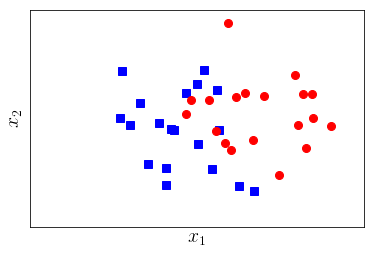

In [1]:
# generate data
# list of points 
import numpy as np 
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

np.random.seed(22)


means = [[2, 2], [4, 2]]
cov = [[.7, 0], [.0, .7]]
N = 20
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)

plt.plot(X0[:, 0], X0[:, 1], 'bs', markersize = 8, alpha = 1)
plt.plot(X1[:, 0], X1[:, 1], 'ro', markersize = 8, alpha = 1)
plt.axis('equal')
plt.ylim(0, 4)
plt.xlim(0, 5)

    # hide tikcs 
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticks([])
cur_axes.axes.get_yaxis().set_ticks([])

plt.xlabel('$x_1$', fontsize = 20)
plt.ylabel('$x_2$', fontsize = 20)
plt.show()

In [16]:
X = np.vstack((X0, X1))
y = np.vstack((np.ones((N,1 )), -np.ones((N,1 )))).reshape((2*N,))

In [28]:
from sklearn.svm import SVC
#with C = 100
C = 100
clf = SVC(kernel = 'linear', C = C)
clf.fit(X, y) 

w_sklearn = clf.coef_.reshape(-1, 1)
b_sklearn = clf.intercept_[0]

print(w_sklearn)
print(b_sklearn) 
print("-"*30)

#with C = 0.1
C = 0.1 
clf_1 = SVC(kernel = 'linear', C = C)
clf_1.fit(X, y) 

w_sklearn_1 = clf_1.coef_.reshape(-1, 1)
b_sklearn_1 = clf_1.intercept_[0]
print(w_sklearn_1)
print(b_sklearn_1) 
print("-"*30)
 

[[-1.87461946]
 [-1.80697358]]
8.49691190196
------------------------------
[[-0.75348094]
 [-0.44806212]]
3.13165685239
------------------------------


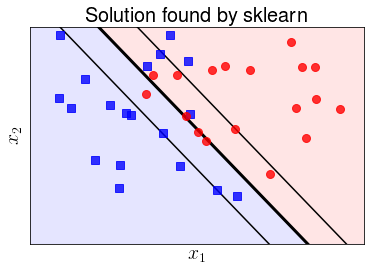

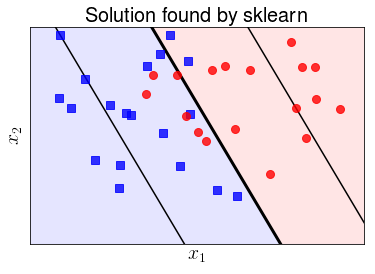

In [26]:
def myplot(X0, X1, w, b , tit):
   
    fig, ax = plt.subplots()

    w0 = w[0]
    w1 = w[1]
    x1 = np.arange(-10, 10, 0.1)
    y1 = -w0/w1*x1 - b/w1
    y2 = -w0/w1*x1 - (b-1)/w1
    y3 = -w0/w1*x1 - (b+1)/w1
    plt.plot(x1, y1, 'k', linewidth = 3)
    plt.plot(x1, y2, 'k')
    plt.plot(x1, y3, 'k')

        # equal axis and lim
    plt.axis('equal')
    plt.ylim(0, 3)
    plt.xlim(2, 4)

        # hide tikcs 
    cur_axes = plt.gca()
    cur_axes.axes.get_xaxis().set_ticks([])
    cur_axes.axes.get_yaxis().set_ticks([])

        # fill two regions
    y4 = 10*x1
    plt.plot(x1, y1, 'k')
    plt.fill_between(x1, y1, color='blue', alpha='0.1')
    plt.fill_between(x1, y1, y4, color = 'red', alpha = '.1')

    plt.xlabel('$x_1$', fontsize = 20)
    plt.ylabel('$x_2$', fontsize = 20)
    plt.title('Solution found by ' + tit, fontsize = 20)

    plt.plot(X0[:, 0], X0[:, 1], 'bs', markersize = 8, alpha = .8)
    plt.plot(X1[:, 0], X1[:, 1], 'ro', markersize = 8, alpha = .8)
      
    plt.show()

myplot(X0, X1, w_sklearn, b_sklearn, 'sklearn')
myplot(X0, X1, w_sklearn_1, b_sklearn_1, 'sklearn')


Comments:   
1. Larger C is , larger the margin is.  

## Example 2 


In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import label_binarize
from sklearn.cross_validation import train_test_split
from sklearn.grid_search import GridSearchCV
from sklearn.svm import SVC, LinearSVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report
%matplotlib inline
plt.style.use('seaborn-white')

#Function to plot a classifier with support vectors
def plot_svc(svc, X, y, h=0.02, pad=0.25):
    x_min, x_max = X[:, 0].min()-pad, X[:, 0].max()+pad
    y_min, y_max = X[:, 1].min()-pad, X[:, 1].max()+pad
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)

    plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=plt.cm.Paired)
    # Support vectors indicated in plot by vertical lines
    sv = svc.support_vectors_
    plt.scatter(sv[:,0], sv[:,1], c='k', marker='|', s=100, linewidths='1')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()
    print('Number of support vectors: ', svc.support_.size)  
     


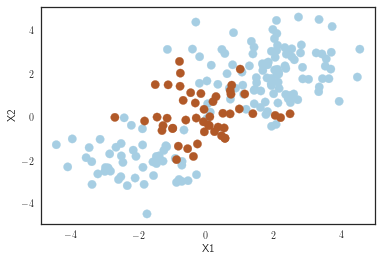

In [41]:
# Generating test data
np.random.seed(8)
X = np.random.randn(200,2)
X[:100] = X[:100] +2
X[101:150] = X[101:150] -2
y = np.concatenate([np.repeat(-1, 150), np.repeat(1,50)])

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=2)

plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=plt.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2')

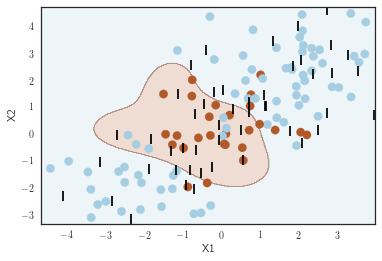

Number of support vectors:  51


In [42]:
svm = SVC(C=1.0, kernel='rbf', gamma=1)
svm.fit(X_train, y_train)
plot_svc(svm, X_test, y_test)

In [35]:
# Set the parameters by cross-validation
tuned_parameters = [{'C': [0.01, 0.1, 1, 10, 100],
                     'gamma': [0.5, 1,2,3,4]}]
clf = GridSearchCV(SVC(kernel='rbf'), tuned_parameters, cv=10, scoring='accuracy')
clf.fit(X_train, y_train)
clf.grid_scores_

[mean: 0.77000, std: 0.03039, params: {'C': 0.01, 'gamma': 0.5},
 mean: 0.77000, std: 0.03039, params: {'C': 0.01, 'gamma': 1},
 mean: 0.77000, std: 0.03039, params: {'C': 0.01, 'gamma': 2},
 mean: 0.77000, std: 0.03039, params: {'C': 0.01, 'gamma': 3},
 mean: 0.77000, std: 0.03039, params: {'C': 0.01, 'gamma': 4},
 mean: 0.77000, std: 0.03039, params: {'C': 0.1, 'gamma': 0.5},
 mean: 0.77000, std: 0.03039, params: {'C': 0.1, 'gamma': 1},
 mean: 0.77000, std: 0.03039, params: {'C': 0.1, 'gamma': 2},
 mean: 0.77000, std: 0.03039, params: {'C': 0.1, 'gamma': 3},
 mean: 0.77000, std: 0.03039, params: {'C': 0.1, 'gamma': 4},
 mean: 0.92000, std: 0.11024, params: {'C': 1, 'gamma': 0.5},
 mean: 0.92000, std: 0.09015, params: {'C': 1, 'gamma': 1},
 mean: 0.90000, std: 0.09046, params: {'C': 1, 'gamma': 2},
 mean: 0.88000, std: 0.07597, params: {'C': 1, 'gamma': 3},
 mean: 0.85000, std: 0.06424, params: {'C': 1, 'gamma': 4},
 mean: 0.92000, std: 0.07827, params: {'C': 10, 'gamma': 0.5},
 mean:

In [36]:
clf.best_params_

{'C': 1, 'gamma': 0.5}

In [38]:
confusion_matrix(y_test, clf.best_estimator_.predict(X_test))

array([[67,  6],
       [ 9, 18]])

In [39]:
# 15% of test observations misclassified
clf.best_estimator_.score(X_test, y_test)

0.84999999999999998

## Example 3
This example is about detecting Gene 

In [59]:
import scipy.io as sio
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

A = sio.loadmat('data/myARgender.mat')

X_train = A['Y_train'].T 
X_test = A['Y_test'].T 
N = 700
y_train = A['label_train'].reshape(N)
y_test = A['label_test'].reshape(N)


In [57]:
# poly kernel
clf = SVC(kernel='poly', degree = 3, gamma=1, C = 100)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy: %.2f %%" %(100*accuracy_score(y_test, y_pred)))

Accuracy: 92.86 %


In [58]:
# Gaussien kernel
clf1 = SVC(kernel='rbf', gamma=1, C = 100)
clf1.fit(X_train, y_train)
y_pred = clf1.predict(X_test)
print("Accuracy: %.2f %%" %(100*accuracy_score(y_test, y_pred)))

Accuracy: 92.86 %


## Example 4: Digits

C:\Users\Stagiaire\lib\site-packages\ipykernel\__main__.py:37: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\Stagiaire\lib\site-packages\ipykernel\__main__.py:40: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\Stagiaire\lib\site-packages\ipykernel\__main__.py:41: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\Stagiaire\lib\site-packages\ipykernel\__main__.py:50: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
             precision    recall  f1-score   support

          0       1.00      0.99      0.99        88
          1       0.99      0.97      0.98        91
          2       0.99      0.99      0.99        86
          3       0.98      0.87      0.92        91
          4       0.99      0.96      0.97        92
          5       0.95      0.97      0.96        91
          6       0.99      0.99      0.99        91
          7       0.96      0.99      0.97        89
          8       0.94      1.00      0.97        88
          9       0.93      0.98      0.95        92

avg / total       0.97      0.97      0.97       899


Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  

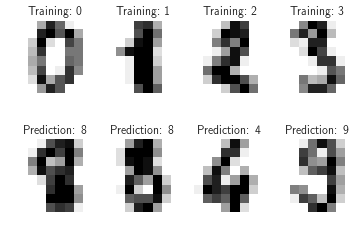

In [71]:
# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics

# The digits dataset
digits = datasets.load_digits()


# The data that we are interested in is made of 8x8 images of digits, let's
# have a look at the first 4 images, stored in the `images` attribute of the
# dataset.  If we were working from image files, we could load them using
# matplotlib.pyplot.imread.  Note that each image must have the same size. For these
# images, we know which digit they represent: it is given in the 'target' of
# the dataset.
images_and_labels = list(zip(digits.images, digits.target))
#digits.images 8x8 pixels
#digits.target is a target of digits.images

for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

# To apply a classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)

data = digits.images.reshape((n_samples, -1))

# Create a classifier: a support vector classifier
classifier = svm.SVC(gamma=0.001)

# We learn the digits on the first half of the digits
classifier.fit(data[:n_samples / 2], digits.target[:n_samples / 2])

# Now predict the value of the digit on the second half:
expected = digits.target[n_samples / 2:]
predicted = classifier.predict(data[n_samples / 2:])

print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))
#The diagonal elements represent the number of points for which the predicted label is equal to the true label, 
#while off-diagonal elements are those that are mislabeled by the classifier. 
#The higher the diagonal values of the confusion matrix the better, indicating many correct predictions.

images_and_predictions = list(zip(digits.images[n_samples / 2:], predicted))
for index, (image, prediction) in enumerate(images_and_predictions[:4]):
    plt.subplot(2, 4, index + 5)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)

plt.show()

# Reference: 
1. [Soft margin SVM](http://machinelearningcoban.com/2017/04/13/softmarginsmv/)
2. Pattern recognition and machine learning. Bishop
